In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab #Imports matplotlib and a host of other useful modules
import pickle
import time

import sys
# sys.path.append("./")
import motion_planner as mp
from motion_planner import StateP

In [3]:
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logging.info('Logging enabled in notebook')


04:33:57 INFO:Logging enabled in notebook


# List datasets

In [1]:
ls '.'

arcs.ipynb                     ne_sample_traj.pickle
evaluate.ipynb                 ne_sample_unreachables.pickle
field_drawings.ipynb           ne_stage1.pickle
load_mp.py                     ne_stage2.pickle
mem_profiling.py               ne_stage3.pickle
motion_planner.py              ne_stage4.pickle
motion_planner.pyc             ne_unreachables.pickle
mp_deprecated.ipynb            oldcode/
n_remaining.pickle             readme.md
n_sample.pickle                requirements.txt
n_sample_stage2.pickle         results.txt
n_sample_stage4.pickle         runs/
n_sample_traj.pickle           sample.pickle
n_sample_unreachables.pickle   sample_stage2.pickle
n_stage1.pickle                sample_stage4.pickle
n_stage2.pickle                sample_traj.pickle
n_stage3.pickle                sample_trajectories.ipynb
n_stage4.pickle                spacefilling_circles.ipynb
n_unreachables.pickle          stage1.pickle
ne_remaining.pickle            stage2.pickle
ne_sample.pickle           

# Sample Plan Trajectories for Northeast Peg

04:34:25 INFO:Loading pickle file : ne_sample_traj.pickle


Number of trajectories loaded:  20000
Number trajectories with 1 stage :  383
Num trajectories: 383


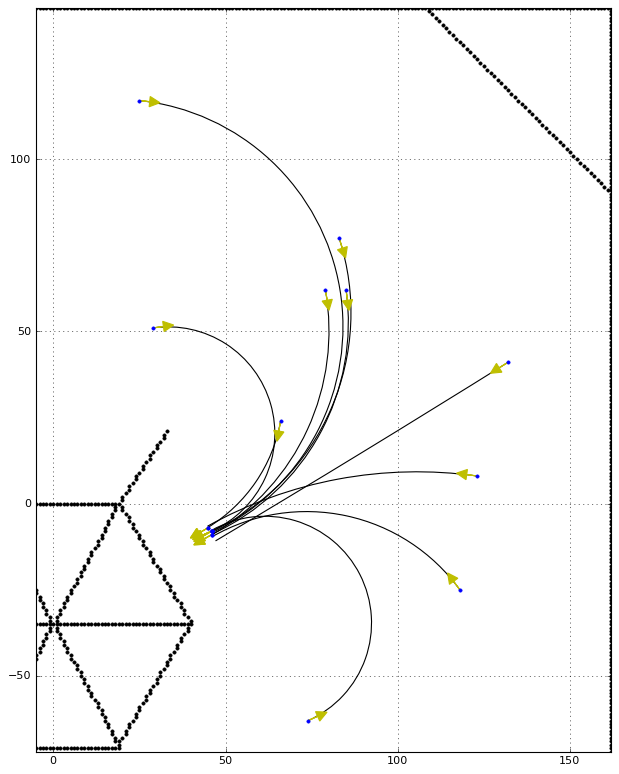

<module 'matplotlib.pyplot' from '/Users/mark/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [4]:
##
##                Northeast peg
##

mp=reload(mp)
##
## Draws examples of paths having 1 stage
##
trajsNE = mp.load_config('ne_sample_traj.pickle')

print "Number of trajectories loaded: ", len(trajsNE)
trajectories1 = dict([(k,v) for k,v in trajsNE.iteritems() if len(trajsNE[k])==1])
print "Number trajectories with 1 stage : ", len(trajectories1)

if not trajectories1:
    print "Warning : none found -- clipping "
    trajectories1 = dict([(k,v[-1:]) for k,v in trajsNE.iteritems()])
    print "Number trajectories with 1 stage : ", len(trajectories1)


print "Num trajectories:",len(trajectories1)
mp.path_plot_xyt(trajectories1,xlim=(-5,mp.UPPER_XLIMIT), ylim=(-72,mp.UPPER_YLIMIT), 
                 maxpaths=10, arrowsize=3, arrowlength=3, figsize=12, verbose=False)

Number trajectories having 2 stages :  15568
Num trajectories: 15568


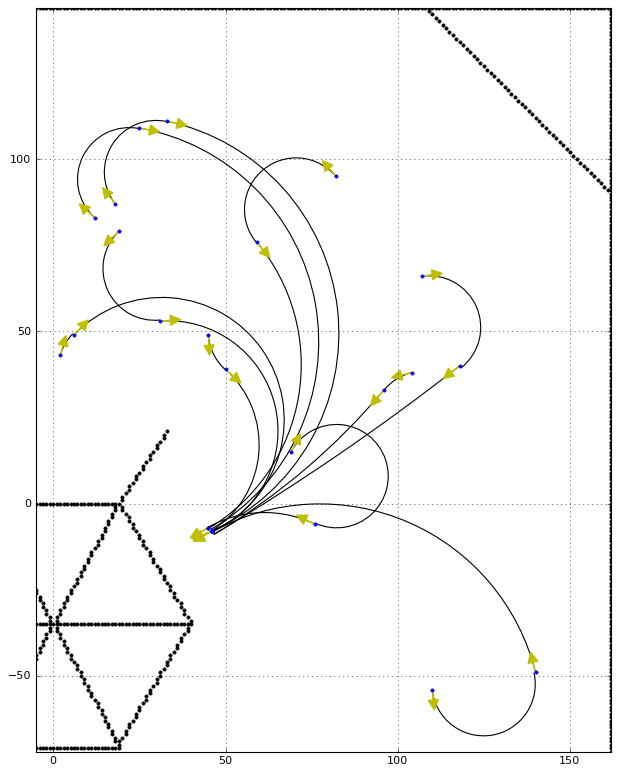

In [432]:
##
## Draws examples of paths having 2 stages
##
trajectories2 = dict([(k,v) for k,v in trajsNE.iteritems() if len(trajsNE[k])==2])
print "Number trajectories having 2 stages : ", len(trajectories2)

print "Num trajectories:",len(trajectories2)
maxx,maxy = mp.UPPER_XLIMIT,mp.UPPER_YLIMIT
#maxx,maxy = 50, 80
mp.path_plot_xyt(trajectories2,
                 xlim=(-5,maxx), ylim=(-72,maxy), 
                 maxpaths=10, arrowsize=3, arrowlength=3, figsize=12, verbose=False)

Number trajectories having 3 stages :  3920


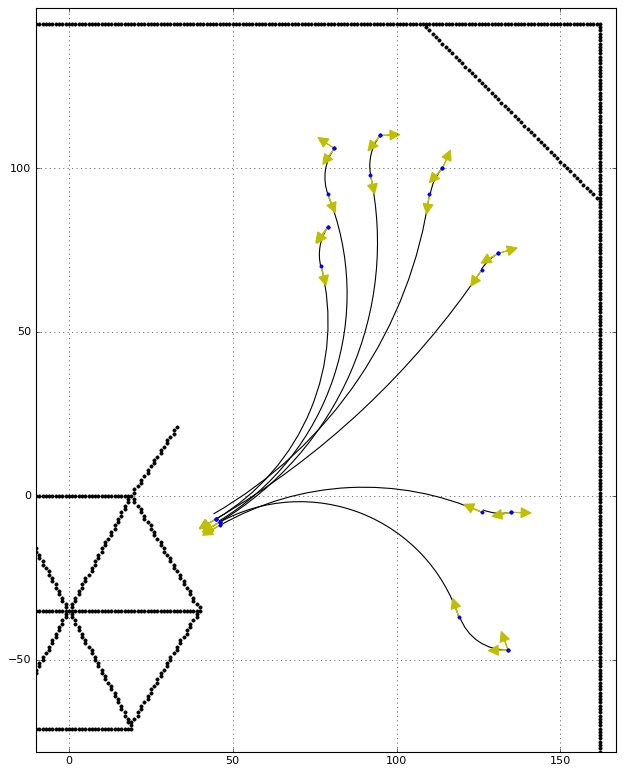

<module 'matplotlib.pyplot' from '/Users/mark/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [6]:
##
## Draws examples of paths having 3 stages
##
trajectories3 = dict([(k,v) for k,v in trajsNE.iteritems() if len(trajsNE[k])==3])
print "Number trajectories having 3 stages : ", len(trajectories3)
mp.path_plot_xyt(trajectories3,xlim=(-10,mp.UPPER_XLIMIT+5), ylim=(-78,mp.UPPER_YLIMIT+5), 
                 maxpaths=7, arrowsize=3, arrowlength=3, figsize=12, verbose=False)

Number trajectories having 4 stages :  129


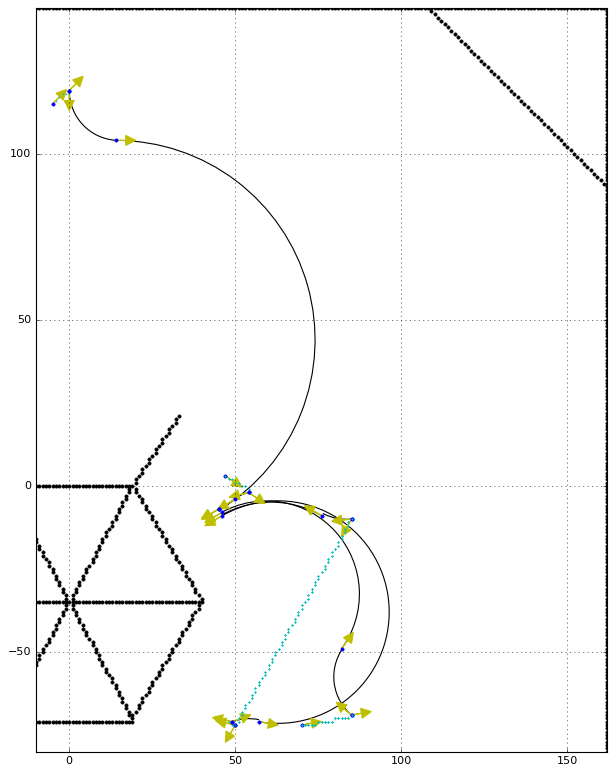

<module 'matplotlib.pyplot' from '/Users/mark/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [7]:
##
## Draws examples of paths having 4 stages
##
trajectories4 = dict([(k,v) for k,v in trajsNE.iteritems() if len(trajsNE[k])==4])
print "Number trajectories having 4 stages : ", len(trajectories4)
mp.path_plot_xyt(trajectories4,xlim=(-10,mp.UPPER_XLIMIT), ylim=(-80,mp.UPPER_YLIMIT), 
                 maxpaths=5, arrowsize=3, arrowlength=3, figsize=12, verbose=False)

Trajectories where the last move is under 40 inches.
Number trajectories sampled : 2123 


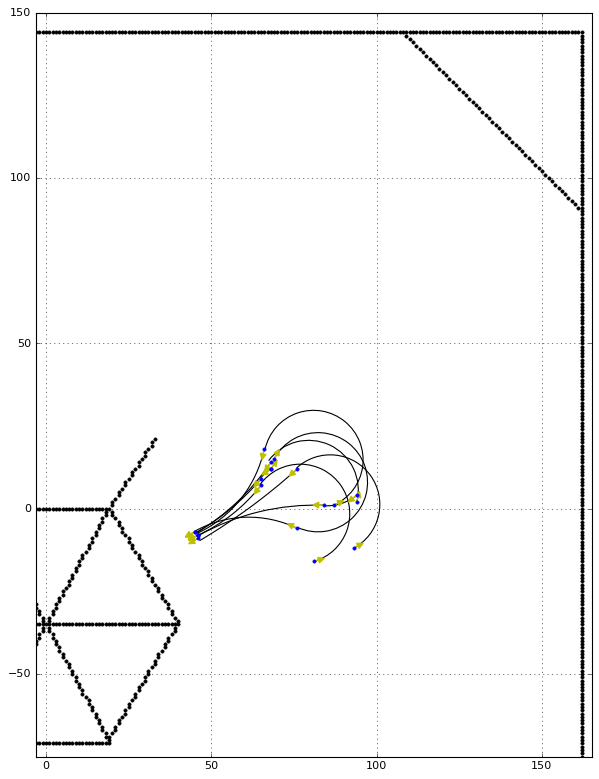

In [435]:
##
## Draws examples of paths having a short final move
##
maxdist = 40
tshort = {}
for k,v in trajsNE.iteritems():
    lastpath = v[-1]
    if lastpath[4] < maxdist:
        tshort[k] = v
print "Trajectories where the last move is under %d inches." % maxdist
print "Number trajectories sampled : %d " % len(tshort)

mp.path_plot_xyt(tshort,xlim=(-3,165), ylim=(-75,150), 
                 maxpaths=7, arrowsize=1.8, arrowlength=1.5, figsize=12, verbose=False)

Examples of 4 stage paths where final move is under 15 inches
Number trajectories sampled : 52 


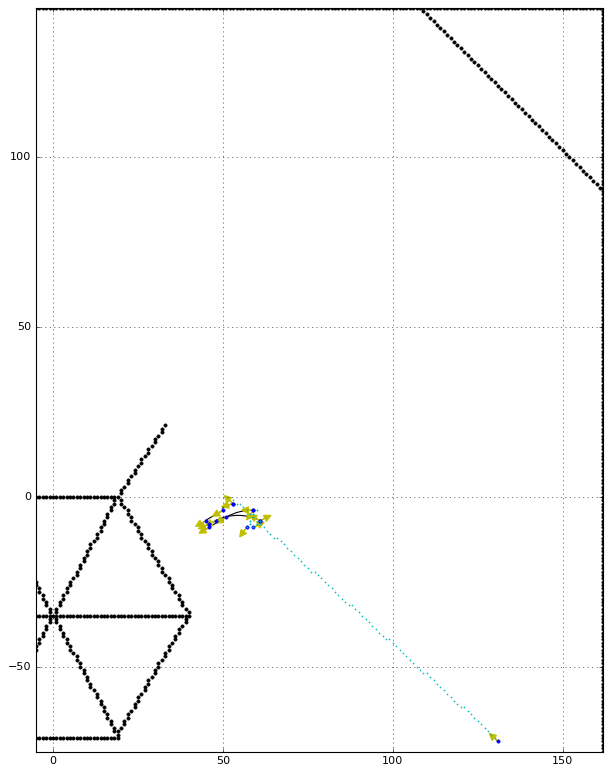

In [436]:
##
## Draws examples of 4 stage paths where final move is short
##
maxdist = 15
tshort = {}
for k,v in trajsNE.iteritems():
    lastpath = v[-1]
    if lastpath[4] < maxdist and len(trajsNE[k])==4:
        tshort[k] = v
print "Examples of 4 stage paths where final move is under %d inches" % maxdist
print "Number trajectories sampled : %d " % len(tshort)
limx,limy=mp.UPPER_XLIMIT,mp.UPPER_YLIMIT
mp.path_plot_xyt(tshort,xlim=(-5,limx), ylim=(-75,limy), 
                 maxpaths=3, arrowsize=2, arrowlength=1.5, figsize=12, verbose=False)

Number trajectories under 20 inches long : 294 


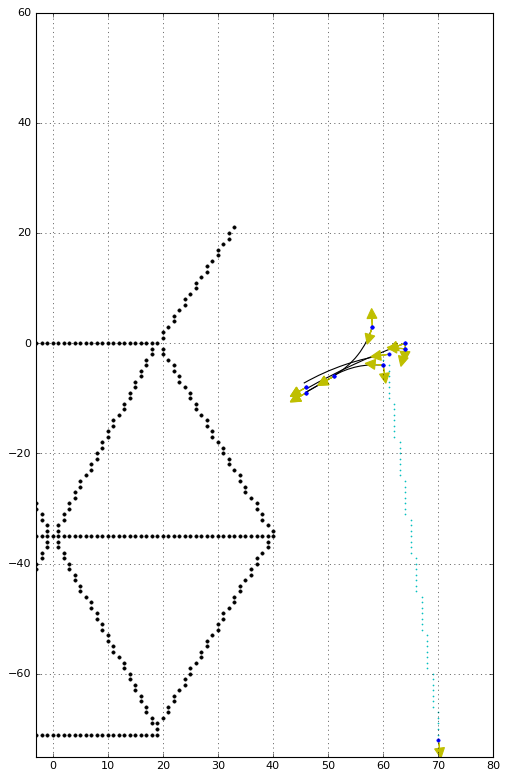

In [437]:
##
## Draws examples of shorter paths 
##
maxdist = 20
tshort = {}
for k,v in trajsNE.iteritems():
    sumpath = 0
    for path in v:
        sumpath += path[4]
    if sumpath < maxdist:
        tshort[k] = v
print "Number trajectories under %d inches long : %d " % (maxdist, len(tshort))
mp.path_plot_xyt(tshort,xlim=(-3,80), ylim=(-75,60), 
                 maxpaths=4, arrowsize=1.8, arrowlength=1.5, figsize=12, verbose=False)

Number trajectories initially closer to goal before moving out and back : 15 


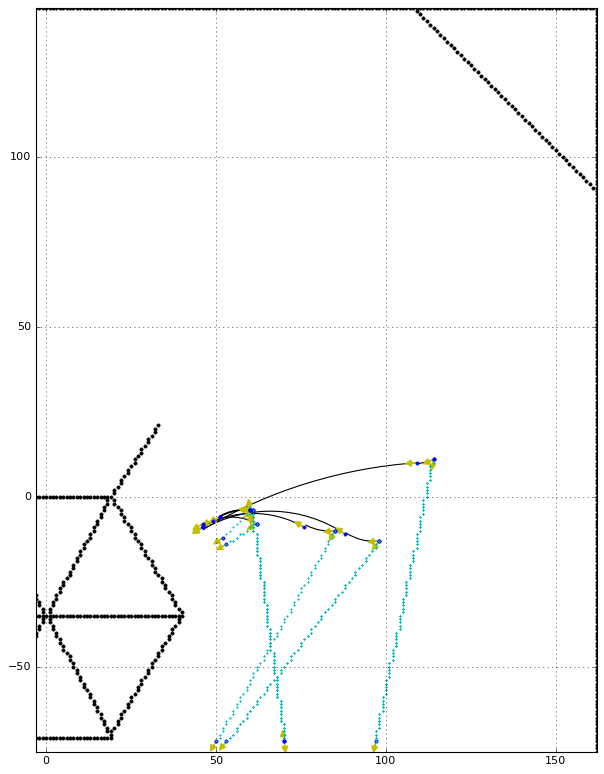

In [438]:
##
## Draws examples where initial starting point is near goal 
##
maxdist = 10
tshort = {}
for k,v in trajsNE.iteritems():
    firstmove = v[0]
    d_primary = mp.xy_dist((k[0],k[1]),(firstmove[2][0],firstmove[2][1]))
    d_next = mp.xy_dist((k[0],k[1]),(firstmove[0][0],firstmove[0][1]))
    if d_primary<d_next and len(trajsNE[k])==4:
        tshort[k] = v
print "Number trajectories initially closer to goal before moving out and back : %d " % (len(tshort))
limx,limy=mp.UPPER_XLIMIT,mp.UPPER_YLIMIT
mp.path_plot_xyt(tshort,xlim=(-3,limx), ylim=(-75,limy), 
                 maxpaths=7, arrowsize=1.8, arrowlength=1.5, figsize=12, verbose=False)

Sample of trajectories over 220 inches long : 3 


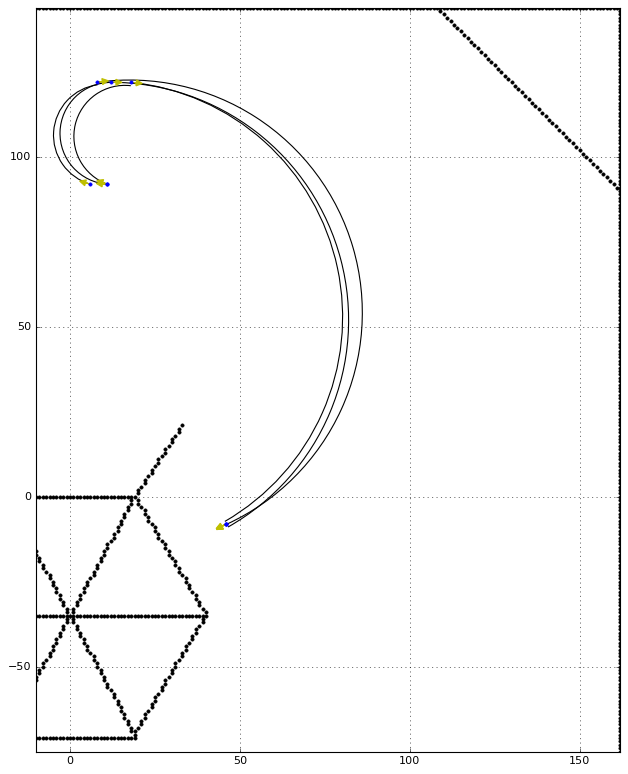

In [441]:
##
## Draws examples of longer paths 
##
mindist = 220
tshort = {}
for k,v in trajsNE.iteritems():
    sumpath = 0
    for path in v:
        sumpath += path[4]
    if sumpath > mindist:
        tshort[k] = v
print "Sample of trajectories over %d inches long : %d " % (mindist, len(tshort))
limx,limy=mp.UPPER_XLIMIT,mp.UPPER_YLIMIT
mp.path_plot_xyt(tshort,xlim=(-10,limx), ylim=(-75,limy), 
                 maxpaths=4, arrowsize=1.8, arrowlength=1.5, figsize=12, verbose=False)

# Sample trajectories for North peg

04:36:27 INFO:Loading pickle file : n_sample_traj.pickle


Number of trajectories loaded:  20000
Number trajectories with 1 stage :  711
Num trajectories: 711


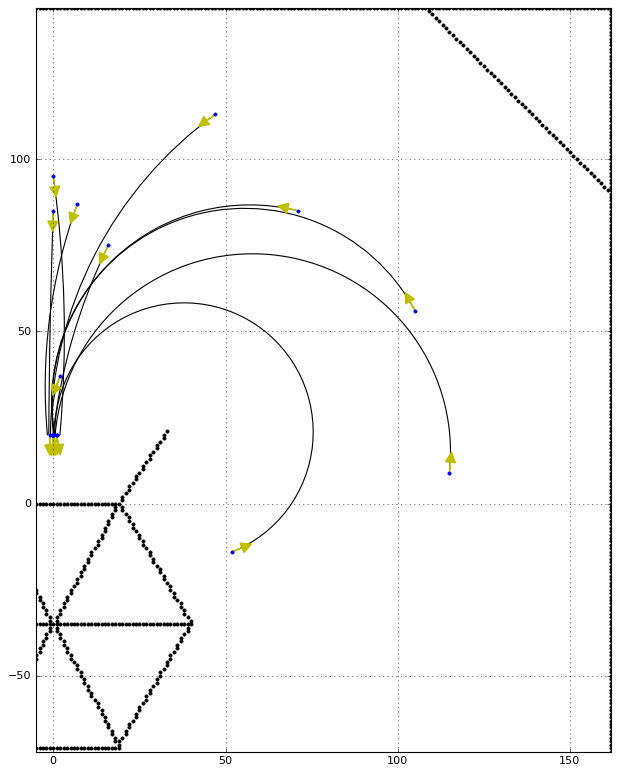

<module 'matplotlib.pyplot' from '/Users/mark/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [8]:
##   
##                              NORTH PEG
##

##
## Draws examples of paths having 1 stage
##
trajs = mp.load_config('n_sample_traj.pickle')

print "Number of trajectories loaded: ", len(trajs)
trajectories1 = dict([(k,v) for k,v in trajs.iteritems() if len(trajs[k])==1])
print "Number trajectories with 1 stage : ", len(trajectories1)

if not trajectories1:
    print "Warning : none found -- clipping "
    trajectories1 = dict([(k,v[-1:]) for k,v in trajs.iteritems()])
    print "Number trajectories with 1 stage : ", len(trajectories1)


print "Num trajectories:",len(trajectories1)
mp.path_plot_xyt(trajectories1,xlim=(-5,mp.UPPER_XLIMIT), ylim=(-72,mp.UPPER_YLIMIT), 
                 maxpaths=10, arrowsize=3, arrowlength=3, figsize=12, verbose=False)

Number trajectories having 2 stages :  17190
Num trajectories: 17190


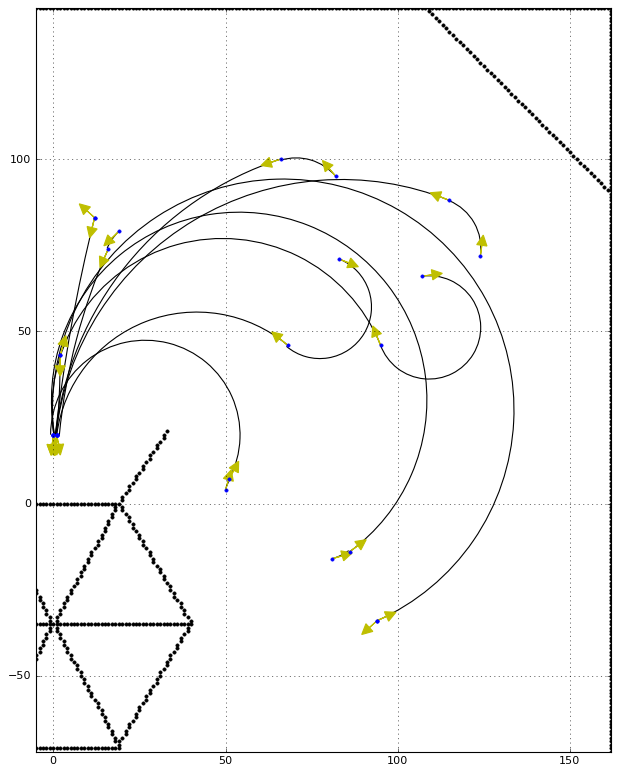

In [413]:
##
## Draws examples of paths having 2 stages
##
trajectories2 = dict([(k,v) for k,v in trajs.iteritems() if len(trajs[k])==2])
print "Number trajectories having 2 stages : ", len(trajectories2)

print "Num trajectories:",len(trajectories2)
maxx,maxy = mp.UPPER_XLIMIT,mp.UPPER_YLIMIT
#maxx,maxy = 50, 80
mp.path_plot_xyt(trajectories2,
                 xlim=(-5,maxx), ylim=(-72,maxy), 
                 maxpaths=10, arrowsize=3, arrowlength=3, figsize=12, verbose=False)

Number trajectories having 3 stages :  2021
Num trajectories: 2021


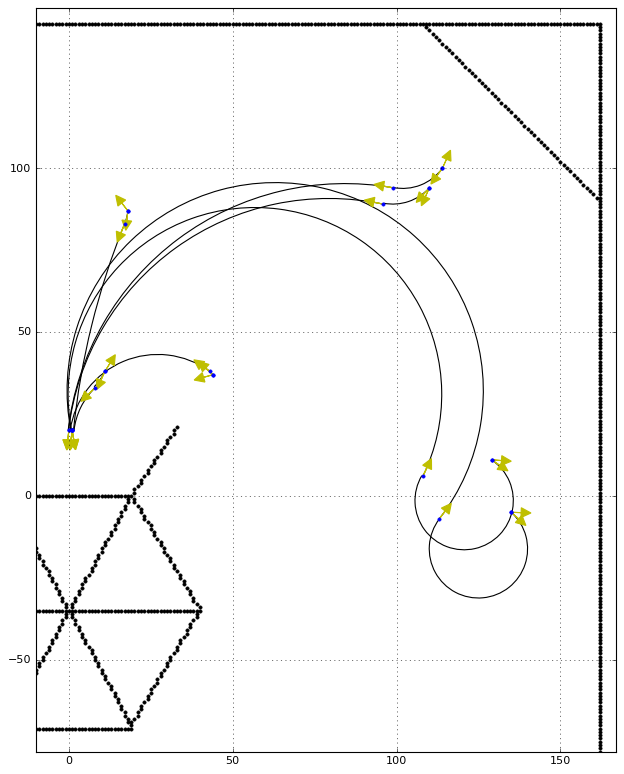

<module 'matplotlib.pyplot' from '/Users/mark/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [9]:
##
## Draws examples of paths having 3 stages
##
trajectories3 = dict([(k,v) for k,v in trajs.iteritems() if len(trajs[k])==3])
print "Number trajectories having 3 stages : ", len(trajectories3)

print "Num trajectories:",len(trajectories3)
mp.path_plot_xyt(trajectories3,xlim=(-10,mp.UPPER_XLIMIT+5), ylim=(-78,mp.UPPER_YLIMIT+5), 
                 maxpaths=7, arrowsize=3, arrowlength=3, figsize=12, verbose=False)

Number trajectories having 4 stages :  78
Num trajectories: 78


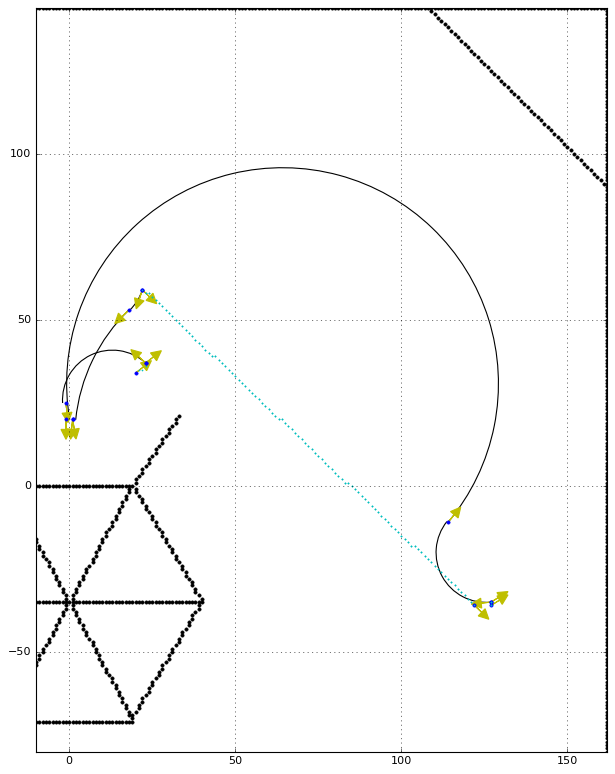

<module 'matplotlib.pyplot' from '/Users/mark/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [10]:
##
## Draws examples of paths having 4 stages
##
trajectories4 = dict([(k,v) for k,v in trajs.iteritems() if len(trajs[k])==4])
print "Number trajectories having 4 stages : ", len(trajectories4)

print "Num trajectories:",len(trajectories4)
mp.path_plot_xyt(trajectories4,xlim=(-10,mp.UPPER_XLIMIT), ylim=(-80,mp.UPPER_YLIMIT), 
                 maxpaths=3, arrowsize=3, arrowlength=3, figsize=12, verbose=False)

Number trajectories under 40 inches long : 1469 


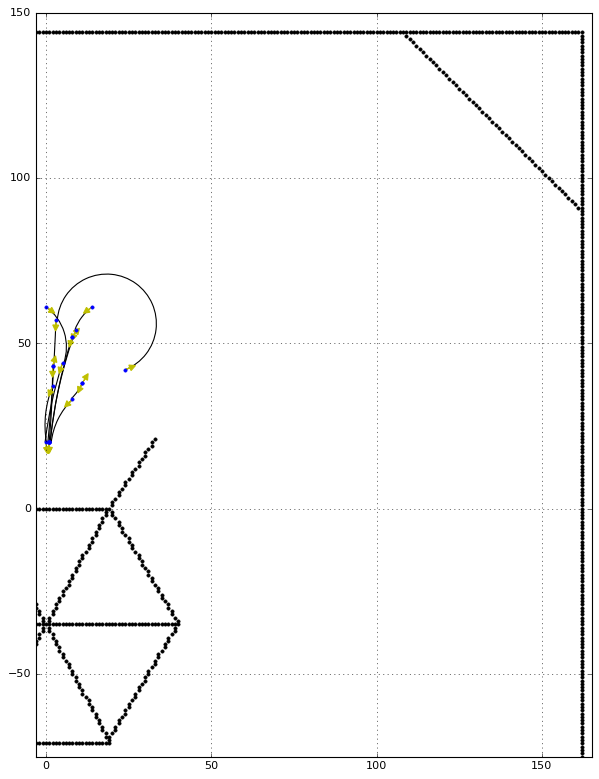

In [424]:
##
## Draws examples of paths having a short final move
##
maxdist = 40
tshort = {}
for k,v in trajs.iteritems():
    lastpath = v[-1]
    if lastpath[4] < maxdist:
        tshort[k] = v
print "Number trajectories under %d inches long : %d " % (maxdist, len(tshort))

mp.path_plot_xyt(tshort,xlim=(-3,165), ylim=(-75,150), 
                 maxpaths=7, arrowsize=1.8, arrowlength=1.5, figsize=12, verbose=False)

Number trajectories under 20 inches long : 294 


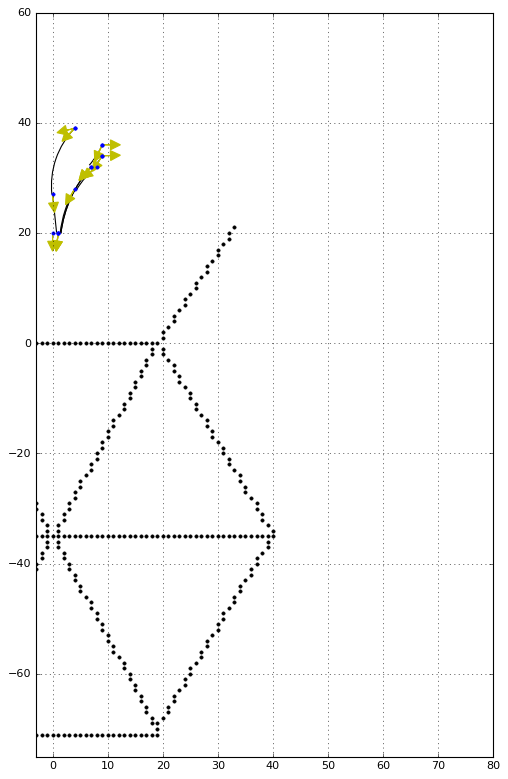

In [425]:
##
## Draws examples of shorter paths 
##
maxdist = 20
tshort = {}
for k,v in trajs.iteritems():
    sumpath = 0
    for path in v:
        sumpath += path[4]
    if sumpath < maxdist:
        tshort[k] = v
print "Number trajectories under %d inches long : %d " % (maxdist, len(tshort))

mp.path_plot_xyt(tshort,xlim=(-3,80), ylim=(-75,60), 
                 maxpaths=4, arrowsize=1.8, arrowlength=1.5, figsize=12, verbose=False)

Number trajectories initially closer to goal before moving out and back : 3 


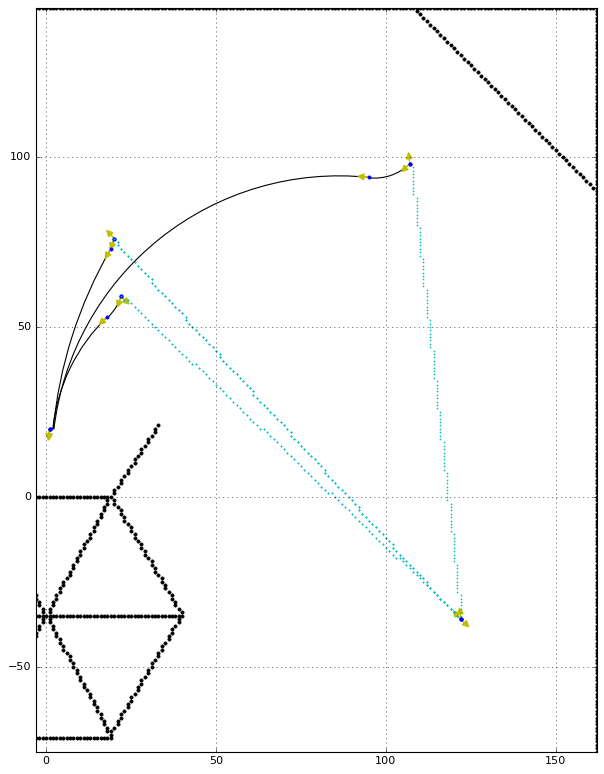

In [442]:
##
## Draws examples where initial starting point is near goal 
##
maxdist = 10
tshort = {}
for k,v in trajs.iteritems():
    firstmove = v[0]
    d_primary = mp.xy_dist((k[0],k[1]),(firstmove[2][0],firstmove[2][1]))
    d_next = mp.xy_dist((k[0],k[1]),(firstmove[0][0],firstmove[0][1]))
    if d_primary<d_next and len(trajs[k])==4:
        tshort[k] = v
print "Number trajectories initially closer to goal before moving out and back : %d " % (len(tshort))
limx,limy=mp.UPPER_XLIMIT,mp.UPPER_YLIMIT
mp.path_plot_xyt(tshort,xlim=(-3,limx), ylim=(-75,limy), 
                 maxpaths=7, arrowsize=1.8, arrowlength=1.5, figsize=12, verbose=False)

Sample of trajectories over 250 inches long : 3 


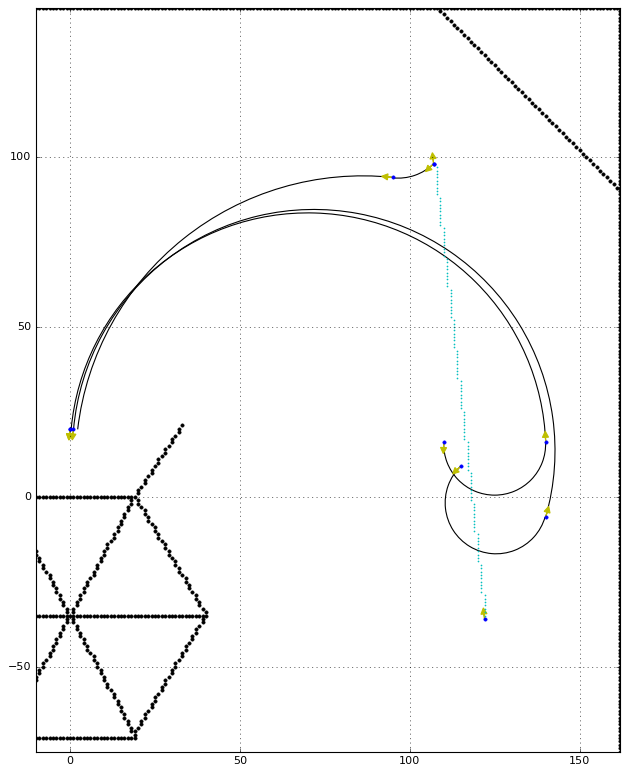

In [445]:
##
## Draws examples of longer paths 
##
mindist = 250
tshort = {}
for k,v in trajs.iteritems():
    sumpath = 0
    for path in v:
        sumpath += path[4]
    if sumpath > mindist:
        tshort[k] = v
print "Sample of trajectories over %d inches long : %d " % (mindist, len(tshort))
limx,limy=mp.UPPER_XLIMIT,mp.UPPER_YLIMIT
mp.path_plot_xyt(tshort,xlim=(-10,limx), ylim=(-75,limy), 
                 maxpaths=4, arrowsize=1.8, arrowlength=1.5, figsize=12, verbose=False)

### Visual collision check.
There should be not be any points lying within half the robot length from the wall.
The following drawing shows that there are few points lying within a comfortable tolerance (half robot length plus a few inches), which drops to zero when looking within half the robot length.

28.5 27.5
6
Plotted 6/6 


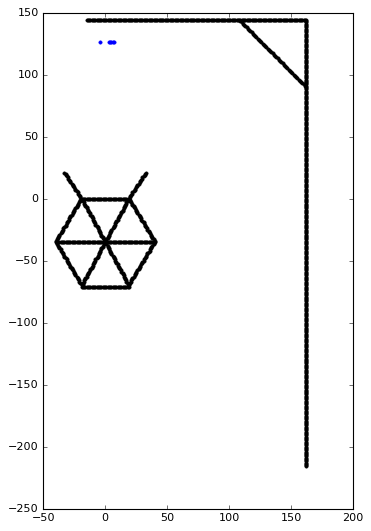

In [622]:
collisions=set()
print mp.ROBOT_LENGTH, mp.ROBOT_WIDTH
tol = mp.ROBOT_LENGTH/2
#tol = mp.ROBOT_WIDTH/2

# robot_diag = int(np.sqrt(mp.ROBOT_LENGTH**2 + mp.ROBOT_WIDTH**2))
# print "robot diagonal: ", robot_diag
# tol = robot_diag/2
for k,v in config.iteritems():
    if abs(k[0]-mp.UPPER_XLIMIT) < tol+5:
        collisions.add((k[0],k[1]))
    if abs(k[1]-mp.UPPER_YLIMIT) < tol+4:
        collisions.add((k[0],k[1]))

print len(collisions)
mp.plot_xy(collisions, max=300)

Number of cells having r=300: 26008
Location p((107, 71)) with heading 224 deg (3.9 rad) on radius 64 
radius:64, heading : 3.9 radians, 224 degrees,  dist: 154.0
Center of turning radius = (61.0, 26.5)
Plotted: 1000 


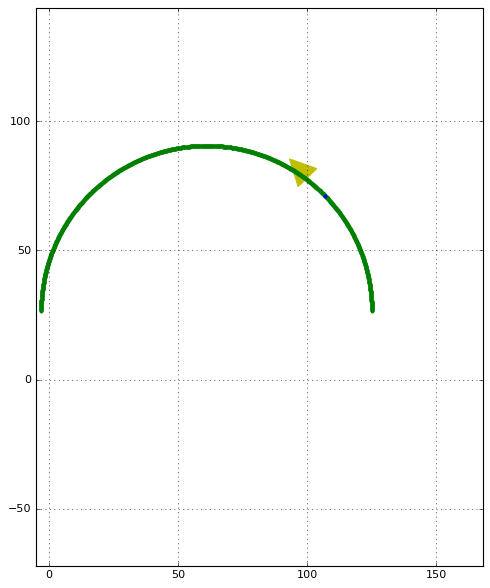

In [176]:
# Display a single stage1 path
d = 150
cc = [(k,v) for k,v in config.iteritems() if v.dist() > d]
print "Number of cells having r=%d: %d" % (r, len(cc))
ss = cc[20]
mp.flow_plot_state(ss,xlim=(mp.LOWER_XLIMIT,mp.UPPER_XLIMIT+6),ylim=(mp.NE_LOWER_YLIMIT,mp.UPPER_YLIMIT),stage2=False,turntype='lh',figsize=9)

# Visualize stage 1 paths

5466
Plotted 201/5466 


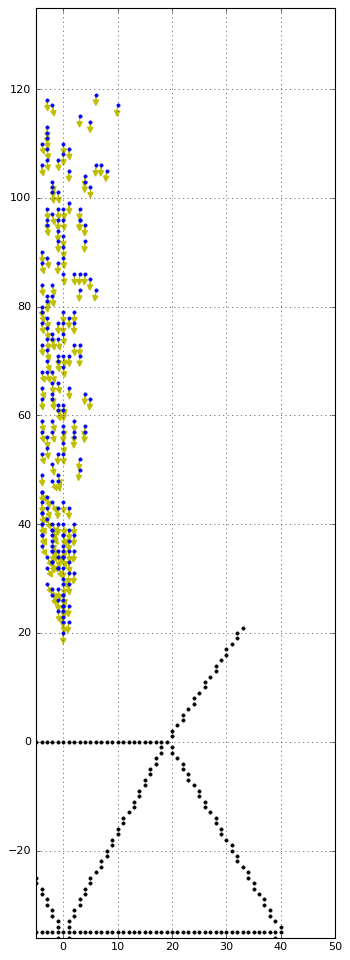

In [284]:
dmin=0
dmax=100
rh = dict([(k,v) for k, v in config.iteritems() if v.type() == 'rh' and dmin<v.dist()<dmax])
print len(rh)
#mp.flow_plot_config(rh,xlim=(-1.5,20),ylim=(-0.5,70),arrowsize=1, arrowlength=1, max=10)
mp.flow_plot_config(rh,xlim=(-5,50),ylim=(-36,135),arrowsize=1, arrowlength=1, max=200, figsize=15)

08:54:31 INFO:Loading config file from n_stage1.pickle
08:54:33 INFO:Loading config file from n_sample_stage2.pickle


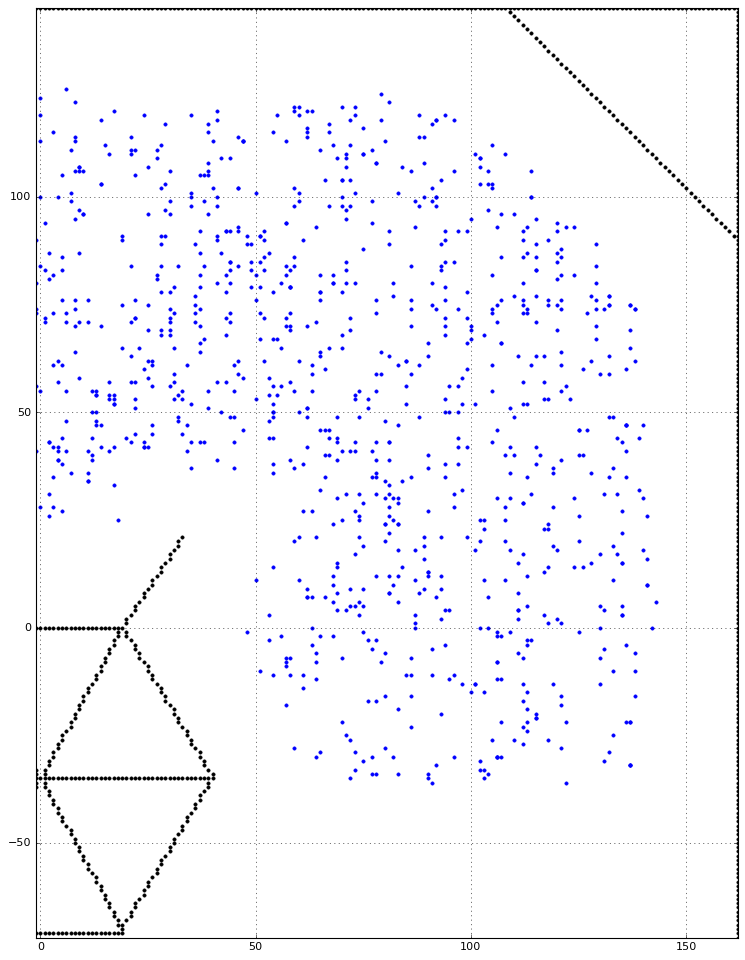

08:54:39 INFO:Plotted 1001/173045 states


In [212]:
#mp=reload(mp)
config = mp.load_config("n_stage1.pickle")
config2 = mp.load_config("n_sample_stage2.pickle")
mp.state_scatterplot(config2,minx=-1,maxx=mp.UPPER_XLIMIT,miny=-72,maxy=mp.UPPER_YLIMIT,max=1000,verbose=False)

08:54:48 INFO:Loading config file from n_stage1.pickle


Plotted 100/100 


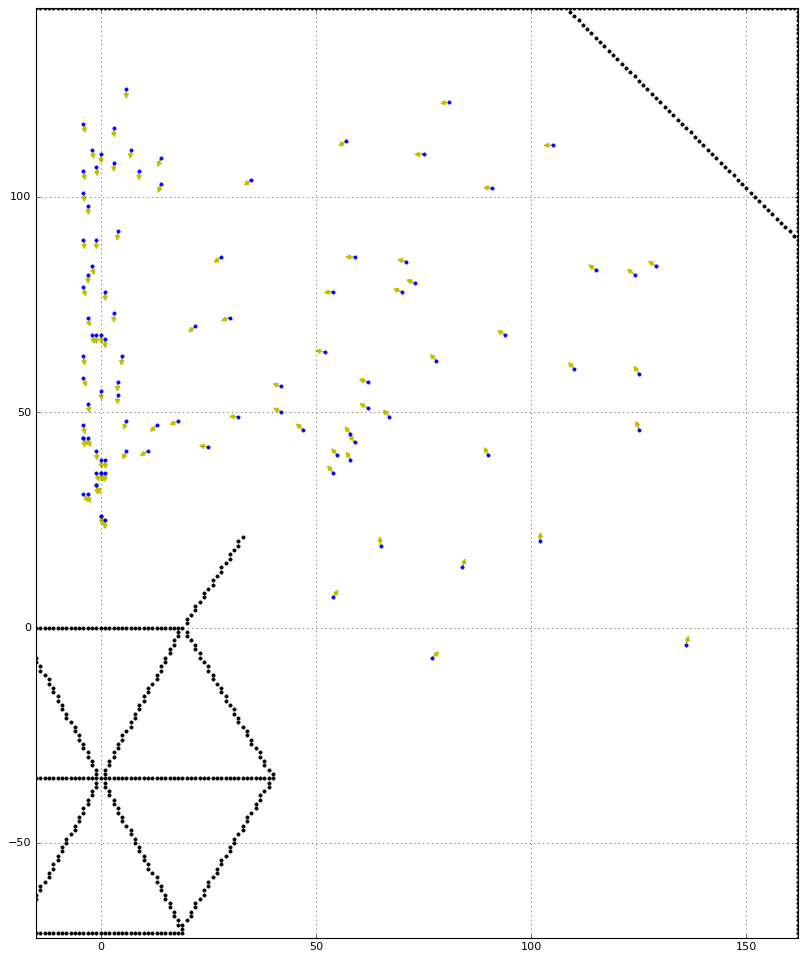

In [213]:
config = mp.load_config("n_stage1.pickle")
ccr = dict([(k,v) for k,v in config.iteritems() if v.type()=='rh'][:50])
ccl = dict([(k,v) for k,v in config.iteritems() if v.type()=='lh'][:50])
ccl.update(ccr)
mp.flow_plot_config(ccl,xlim=(-15,mp.UPPER_XLIMIT),ylim=(-72,mp.UPPER_YLIMIT),arrowsize=1, arrowlength=1, max=200,figsize=15)